## Лабораторна робота № 4. ІП-14 Бабіч Денис. Варіант № 1

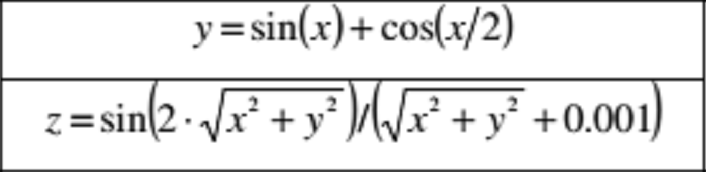

## Підготовчий етап

### Імпортування модулів

In [98]:
import numpy as np
from keras import layers
from keras import models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Допоміжні функції

In [99]:
def build_network(network_type: str, number_hidden_layers: int = 1,  number_neurons_per_layer: int = 1) -> models.Sequential:

    network = models.Sequential()

    if network_type == "feed_forward" or network_type == "cascade_forward":

        for _ in range(number_hidden_layers):
            network.add(layers.Dense(number_neurons_per_layer, activation = "relu"))

    elif network_type == "elman":

        for _ in range(number_hidden_layers):
            network.add(layers.SimpleRNN(number_neurons_per_layer, activation = "relu", return_sequences = True))

    else:
        raise ValueError("Invalid network_type")

    network.add(layers.Dense(1))
    network.compile(loss = "mean_squared_error", optimizer = "adam")

    return network


def build_plot(x_test: np.array, z_test: np.array, z_predicted: np.array, title: str) -> None:
    plt.plot(x_test, z_test, "k--", label = "Real values")
    plt.plot(x_test, z_predicted, "r--", label = "Predicted values")
    plt.title(f"{title}\nMSE: {mean_squared_error(z_test, z_predicted)}")
    plt.grid(True)
    plt.legend()
    plt.show()


def get_y(x: int) -> np.array:
    return np.sin(x) + np.cos(x / 2)


def get_z(x: int, y: int)-> np.array:
    return np.sin(2 * np.sqrt(x ** 2 + y ** 2)) / (np.sqrt(x ** 2 + y ** 2) + 0.001)

## Основний етап

### Підготовка даних

In [100]:
EPOCHS = 1000

x_test = np.linspace(50, 99, 50)
x_train = np.linspace(0, 50, 50)

y_test, y_train = get_y(x_test), get_y(x_train)
z_test, z_train = get_z(x_test, y_test), get_z(x_train, y_train)

data_test = np.vstack((x_test, y_test)).T
data_train = np.vstack((x_train, y_train)).T
data_test_elman = data_test.reshape(data_test.shape[0], 1, 2)
data_train_elman= data_train.reshape(data_train.shape[0], 1, 2)

### Побудова мережей

#### Feed forward backprop (1 внутрішній шар з 10 нейронами)

2/2 [==============================] - 0s 3ms/step


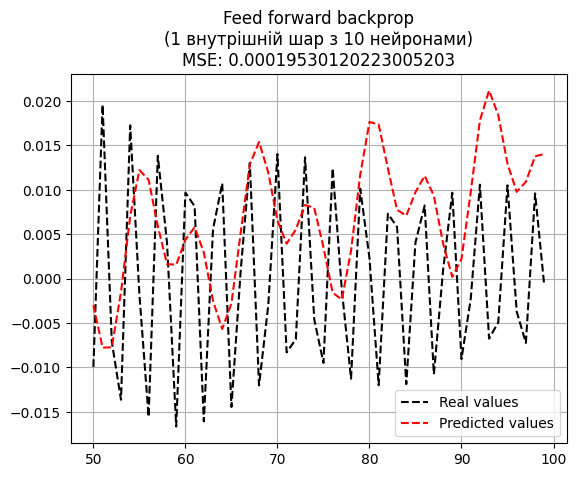

In [101]:
network = build_network("feed_forward", 1, 10)
network.fit(data_train, z_train, epochs = EPOCHS, verbose = 0)
predicted_values = network.predict(data_test)
build_plot(x_test, z_test, predicted_values, "Feed forward backprop\n(1 внутрішній шар з 10 нейронами)")

#### Feed forward backprop (1 внутрішній шар з 20 нейронами)

2/2 [==============================] - 0s 3ms/step


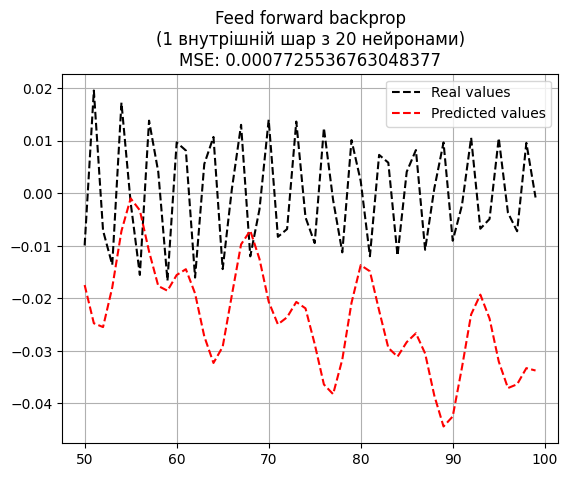

In [102]:
network = build_network("feed_forward", 1, 20)
network.fit(data_train, z_train, epochs = EPOCHS, verbose = 0)
predicted_values = network.predict(data_test)
build_plot(x_test, z_test, predicted_values, "Feed forward backprop\n(1 внутрішній шар з 20 нейронами)")

#### Cascade forward backprop (1 внутрішній шар з 20 нейронами)

2/2 [==============================] - 0s 3ms/step


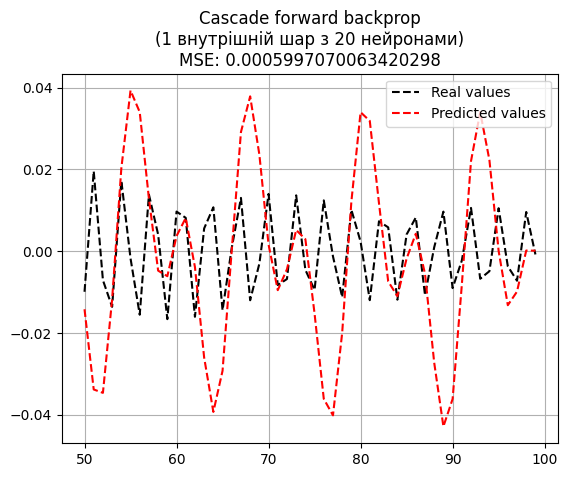

In [103]:
network = build_network("cascade_forward", 1, 20)
network.fit(data_train, z_train, epochs = EPOCHS, verbose = 0)
predicted_values = network.predict(data_test)
build_plot(x_test, z_test, predicted_values, "Cascade forward backprop\n(1 внутрішній шар з 20 нейронами)")

#### Cascade forward backprop (2 внутрішні шари по 10 нейронів)

2/2 [==============================] - 0s 880us/step


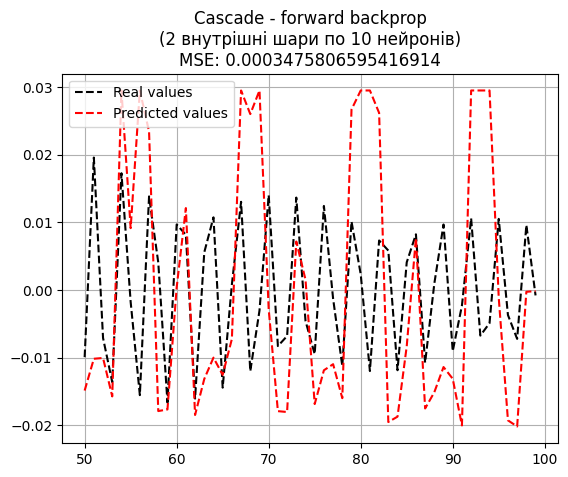

In [104]:
network = build_network("cascade_forward", 2, 10)
network.fit(data_train, z_train, epochs = EPOCHS, verbose = 0)
predicted_values = network.predict(data_test)
build_plot(x_test, z_test, predicted_values, "Cascade - forward backprop\n(2 внутрішні шари по 10 нейронів)")

#### Elman backprop (1 внутрішній шар з 15 нейронами)

2/2 [==============================] - 0s 3ms/step


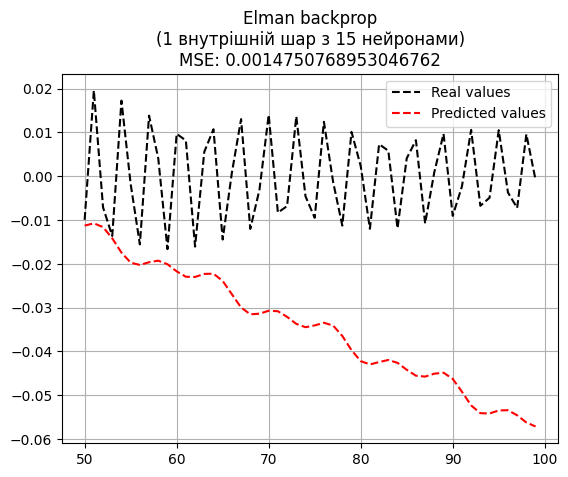

In [105]:
network = build_network("elman", 1, 15)
network.fit(data_train_elman, z_train, epochs = EPOCHS, verbose = 0)
predicted_values = network.predict(data_test_elman)
build_plot(x_test, z_test, predicted_values[:,0,:], "Elman backprop\n(1 внутрішній шар з 15 нейронами)")

#### Elman backprop (3 внутрішні шари по 5 нейронів)

2/2 [==============================] - 0s 3ms/step


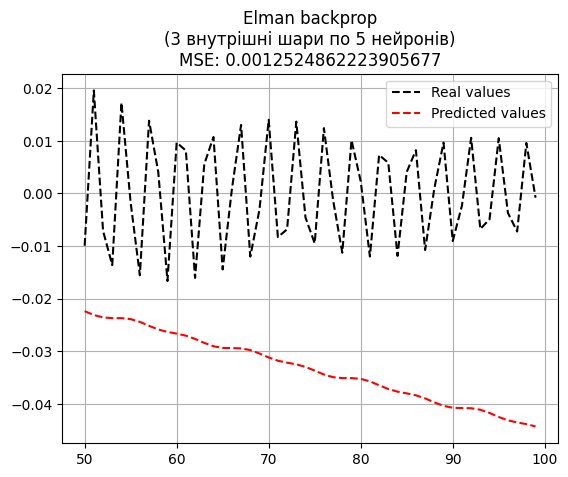

In [106]:
network = build_network("elman", 3, 5)
network.fit(data_train_elman, z_train, epochs = EPOCHS, verbose = 0)
predicted_values = network.predict(data_test_elman)
build_plot(x_test, z_test, predicted_values[:,0,:], "Elman backprop\n(3 внутрішні шари по 5 нейронів)")